## Cybersecurity Threats 2015-2024
Link to dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

The Global Cybersecurity Threats Dataset (2015-2024) provides extensive data on cyberattacks, malware types, targeted industries, and affected countries. It is designed for threat intelligence analysis, cybersecurity trend forecasting, and machine learning model development to enhance global digital security.

### Column Descriptions
Column Name	- Description  
**Country** - Country where the attack occurred  
**Year** - Year of the incident  
**Threat Type** - Type of cybersecurity threat (e.g., Malware, DDoS)  
**Attack Vector** - Method of attack (e.g., Phishing, SQL Injection)  
**Affected Industry** - Industry targeted (e.g., Finance, Healthcare)  
**Data Breached (GB)** - Volume of data compromised  
**Financial Impact ($M)** - Estimated financial loss in millions  
**Severity Level** - Low, Medium, High, Critical  
**Response Time (Hours)** - Time taken to mitigate the attack  
**Mitigation Strategy** - Countermeasures taken  

In [ ]:
import pandas as pd

path_to_csv = "./Cybersecurity/Global_Cybersecurity_Threats_2015-2024.csv"

df_cyber = pd.read_csv(path_to_csv)

df_cyber.head(3)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20


In [9]:
df_cyber["Security Vulnerability Type"].value_counts()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

### Impact of phising attacks over time in the IT sector


In [ ]:
phishing_attacks_it =df_cyber[(df_cyber["Attack Type"] == "Phishing") &(df_cyber["Target Industry"] == "IT")]
phishing_attacks_it.groupby("Year")[["Financial Loss (in Million $)","Number of Affected Users", "Incident Resolution Time (in Hours)"]].sum()



,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Year,,,
2015,247.03,1851623,216
2016,383.02,4585547,360
2017,839.12,9183348,595
2018,366.18,2535973,220
2019,322.94,2817176,405
2020,342.79,3896318,158
2021,338.43,2761059,240
2022,436.97,4225635,304
2023,235.48,1823516,210


In [ ]:
SQL_attacks_it =df_cyber[(df_cyber["Attack Type"] == "SQL Injection")]
SQL_attacks_it.groupby("Year")[["Financial Loss (in Million $)","Number of Affected Users", "Incident Resolution Time (in Hours)"]].sum()


,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Year,,,
2015,2129.80,20784288,1709
2016,2067.31,22799621,1716
2017,2256.01,24493054,1960
2018,2847.24,27648361,2242
2019,2645.21,23280726,1427
2020,3144.69,27230110,2283
2021,3062.49,31692887,2010
2022,2101.37,25721685,1642
2023,3097.32,32539421,2173


Linear Regression Results:
Intercept: -27718.32733333333
Coefficient (Slope): 14.050666666666665
R-squared: 0.0704867375917192


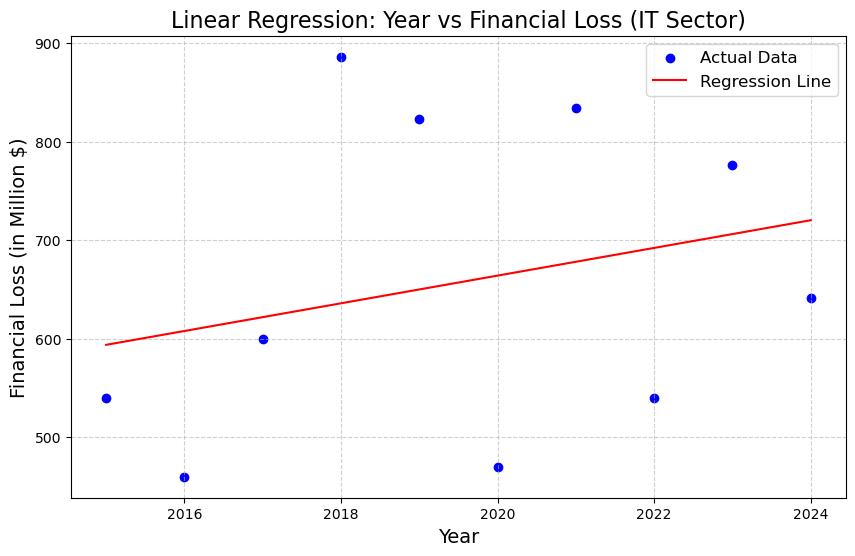

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Filter data for phishing attacks in the IT sector
attacks = df_cyber[(df_cyber["Attack Type"] == "SQL Injection") & (df_cyber["Security Vulnerability Type"] == "Zero-day")]

# Group by year and sum financial losses
loss_by_year = attacks.groupby("Year")["Financial Loss (in Million $)"].sum().reset_index()

# Prepare data for linear regression
X = loss_by_year["Year"].values.reshape(-1, 1)  # Independent variable (Year)
y = loss_by_year["Financial Loss (in Million $)"].values  # Dependent variable (Financial Loss)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Display results
print("Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"R-squared: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Year vs Financial Loss (IT Sector)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Financial Loss (in Million $)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [14]:
import pandas as pd
import statsmodels.api as sm

# Example data

X = df_cyber[(df_cyber["Attack Type"] == "SQL Injection") & (df_cyber["Security Vulnerability Type"] == "Zero-day")]["Year"]
y = df_cyber[(df_cyber["Attack Type"] == "SQL Injection") & (df_cyber["Security Vulnerability Type"] == "Zero-day")]["Financial Loss (in Million $)"]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Show the full summary
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Financial Loss (in Million $)   R-squared:                       0.005
Model:                                       OLS   Adj. R-squared:                 -0.002
Method:                            Least Squares   F-statistic:                    0.6828
Date:                           Wed, 09 Apr 2025   Prob (F-statistic):              0.410
Time:                                   18:16:00   Log-Likelihood:                -624.90
No. Observations:                            134   AIC:                             1254.
Df Residuals:                                132   BIC:                             1260.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

#### Visualization

Linear Regression Results:
Intercept: -28015.078969696962
Coefficient (Slope): 14.088303030303026
R-squared: 0.03647466750356787


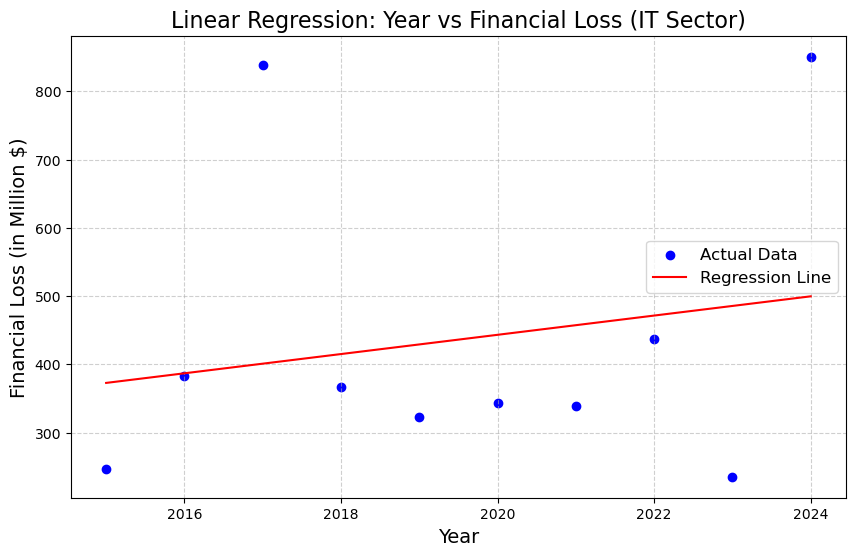

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Filter data for phishing attacks in the IT sector
phishing_attacks_it = df_cyber[(df_cyber["Attack Type"] == "Phishing") & (df_cyber["Target Industry"] == "IT")]

# Group by year and sum financial losses
phishing_loss_by_year = phishing_attacks_it.groupby("Year")["Financial Loss (in Million $)"].sum().reset_index()

# Prepare data for linear regression
X = phishing_loss_by_year["Year"].values.reshape(-1, 1)  # Independent variable (Year)
y = phishing_loss_by_year["Financial Loss (in Million $)"].values  # Dependent variable (Financial Loss)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Display results
print("Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"R-squared: {r2}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Year vs Financial Loss (IT Sector)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Financial Loss (in Million $)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()